<a href="https://colab.research.google.com/github/UiinKim/UiinKim/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   기존 코딩 -> data를 넣으면 해답을 찾는다.
*   머신 러닝 -> data와 해답을 넣고 규칙성을 찾는다.(traing, learning)





*   머신러닝에서는 독립변수 x와 종속변수 y의 관계를 유추하기 위해 수학적으로 식을 세우는 것을 가설(H : Hypothesis)라고 한다.ex) H(x) = wx+b, H(x)=w1x1+w2x2+...+wnxn+b, y는 실제값, H(x)는 가설에 대한 값
*   실제값과 예측값에 대한 오차에 대한 식을 목적함수 or 비용함수 or 손실함수라고 한다.


*   평균제곱오차(MSE : Mean Squared Error) : 모든 점과 직선사이의 거리를 모두 제곱하여 더하고 n으로 나누어 오차의 제곱합에 대한 평균.








*   옵티마이저 알고리즘(=최적화 알고리즘) : 비용 함수를 최소화화는 매개변수 w(가중치), b를 찾기 위한 작업에 사용됨. 대표적으로 경사하강법이 있음.
*   w는 가중치이며 직선의 방정식에서는 기울기이다. 직선의 기울기가 지나치게 높거나 낮을 때 오차가 커진다. b(y절편)도 마찬가지.


*   cost가 최소가 되는 지점은 2차방정식 이상일 경우 곡선이며, 접선의 기울기가 0이 되어야하고, 미분값도 0이 되는 지점이다.

*   결국 최소화w를 구하기 위해서 비용함수(cost(w,b))를 미분하여 현재 w의 접선의 기울기를 구한 후에 접선의 기울기가 낮은 방향으로 w를 다시 미분하고 이 과정을 접선의 기울기가 0인 곳을 향해 w의 값을 변경하는 작업을 반복한다. --> 경사하강법

*   학습률 a(알파)는 접선의 기울기 w-a를 구하는데에 사용하며 w:=w-a(@/@w)cost(w)로 접선의 기울기가 0인 방향으로 조정할 수 있다. (@는 세타)

*   학습률 a(알파)는 지나치게 높을 경우 cost가 발산을 하며 지나치게 낮을 경우 학습 속도가 너무 느려져 적당한 값을 찾아야 한다.




1. 자동미분과 선형회귀 실습

In [28]:
#자동미분
import tensorflow as tf

w=tf.Variable(2.) #tf.Variable을 사용하여 메모리에 저장한 후 사용한다. 업데이트가 가능하며 함수를 만들었을 때 고정이 가능

def f(w): #f(w) 함수 정의
  y=w**2
  z=2*y+5 #2(w**2)+5라는 이차방정식을 세운다.
  return z

In [29]:
with tf.GradientTape() as tape:
  z=f(w)
gradients=tape.gradient(z,[w]) #자동미분
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


In [30]:
#자동미분을 이용한 선형 회귀 구현

#학습될 가중치 변수를 선언
w=tf.Variable(4.0)
b=tf.Variable(1.0)

In [31]:
@tf.function #그래프의 생성과 실험을 분리하여 속도를 높이기 위해 사용
def hypothesis(x): #가설을 함수로 정의
  return w*x+b

In [32]:
x_test=[3.5, 5, 5.5, 6] #임의로 계싼
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [33]:
@tf.function
def mse_loss(y_pred, y): #손실함수
  #예측값과 실제값의 차이값을 제곱하여 평균을 취한다.
  return tf.reduce_mean(tf.square(y_pred-y))

In [34]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [35]:
optimizer=tf.optimizers.SGD(0.01) #옵티마이저(최소비용을 찾기 위한 알고리즘)은 경사하강법을 사용(SGD)하고 학습률은 0.01을 사용한다.

In [36]:
for i in range(301):
  with tf.GradientTape() as tape:
    #현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred=hypothesis(x)

    #평균 제곱 오차를 계산
    cost=mse_loss(y_pred, y)

  #손실함수에 대한 파라미터의 미분값 계산
  gradients=tape.gradient(cost, [w,b]) #손실함수와 w,b로 미분

  #파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [w,b]))

  if i%10==0:
    print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))



epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | w의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | w의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328165
epoch :  30 | w의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306967
epoch :  40 | w의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | w의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | w의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252898
epoch :  70 | w의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | w의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223598
epoch :  90 | w의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | w의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | w의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | w의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | w의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | w의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | w의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

In [37]:
#계속해서 업데이트되며 갈수록 코스트가 낮아진다.

#학습된 w와 b의 값에 대해 임의 입력을 넣었을 경우의 예측값 확인
x_test=[3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


In [38]:
#keras로 선형 회귀 구현
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model=Sequential()#순차적 구조를 가진 모델 생성 기능

#출력 y의 차원(output_dim)은 1. 입력 x의 차원(input_dim)은 1
#선형 회귀이므로 activation은 linear
model.add(Dense(1, input_dim=1, activation='linear')) #Dense는 다른 레이어와 결합하여 딥러닝 모델을 구성할 때 사용.
#입력 벡터와 가중치 행렬의 곱셈에 편향을 더하여 activation으로 거친 출력값을 계산 -> (1개의 bias(wx+b의 b)+input_dims)*output_dim -> 2개의 파라미터

#sgd는 경사 하강법, 학습률은 (learning rate, lr)은 0.01
sgd=optimizers.SGD(lr=0.01)

#손실함수(Loss function)은 평균제곱오차(mse)를 사용한다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])#compile은 모델을 학습하는 메소드. optimizer은 경사하강법(sgd)를 선택하고 손실함수로는 mse(평균제곱오차), 모델과 함께 평가하려는 행렬을 ['mse']로 지정한다.

#주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(x, y, epochs=300) #fit은 주어진 epochs만큼 모델을 학습시키는 메소드이다.


Epoch 1/300
1/1 [==============================] - 0s 313ms/step - loss: 3197.4607 - mse: 3197.4607
Epoch 2/300
1/1 [==============================] - 0s 10ms/step - loss: 394.4562 - mse: 394.4562
Epoch 3/300
1/1 [==============================] - 0s 14ms/step - loss: 49.5669 - mse: 49.5669
Epoch 4/300
1/1 [==============================] - 0s 13ms/step - loss: 7.1300 - mse: 7.1300
Epoch 5/300
1/1 [==============================] - 0s 15ms/step - loss: 1.9077 - mse: 1.9077
Epoch 6/300
1/1 [==============================] - 0s 15ms/step - loss: 1.2643 - mse: 1.2643
Epoch 7/300
1/1 [==============================] - 0s 12ms/step - loss: 1.1843 - mse: 1.1843
Epoch 8/300
1/1 [==============================] - 0s 13ms/step - loss: 1.1736 - mse: 1.1736
Epoch 9/300
1/1 [==============================] - 0s 10ms/step - loss: 1.1715 - mse: 1.1715
Epoch 10/300
1/1 [==============================] - 0s 11ms/step - loss: 1.1704 - mse: 1.1704
Epoch 11/300
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 70ms/step


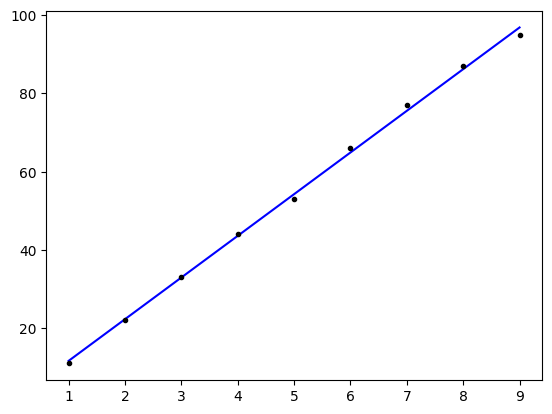

In [39]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [40]:
print(model.predict([9.5]))

1/1 [==============================] - 0s 73ms/step
[[102.185715]]


2. 로지스틱 회귀 -> 이진분류

*   시그모이드 함수(Sigmoid function) : 출력이 0과 1 사이의 값을 가지면서 S자 형태로 그려지는 함수 -> 0과 1 사이의 값을 확률로 해석한다.




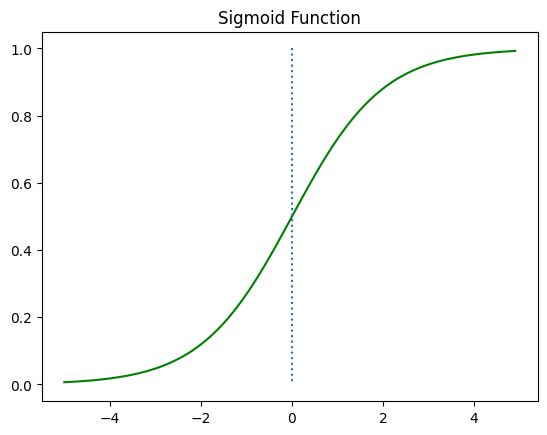

In [41]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
  return 1/(1+np.exp(-x)) #np.exp(x)는 e^x를 의미한다. 해당 리턴 값은 기댓값 H(x)=sigmoid(x)=o(x)로 표현됨.

x=np.arange(-5.0, 5.0, 0.1)
y=sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') #가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()
#이 그래프는 -5.0부터 5.0까지 0.1씩 증가하는 그래프를 보여준다.

<function matplotlib.pyplot.show(close=None, block=None)>

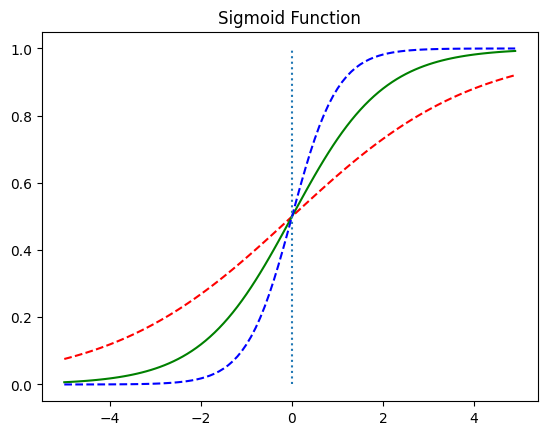

In [42]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

x=np.arange(-5.0, 5.0, 0.1)
y1=sigmoid(x*0.5)
y2=sigmoid(x)
y3=sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') #0.5x 일때
plt.plot(x, y2, 'g')# x일때
plt.plot(x, y3, 'b', linestyle='--') #2x일때
plt.plot([0,0], [0.0,1.0], ':') #가운데 점선
plt.title('Sigmoid Function')
plt.show
#x에 곱한 수가 w이며, w(가중치)의 값이 커질수록 경사가 커지고 w의 값이 작아질수록 경사가 작아진다.

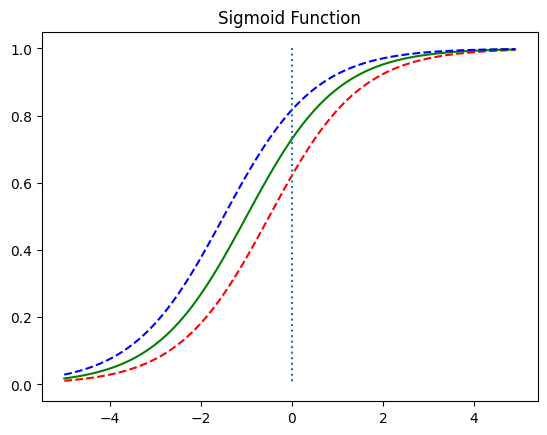

In [43]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()
#b의 값에 따라서 그래프가 이동을 하였는데, 0.5 이상이면 1, 이하이면 0으로 만들어 이진 문제를 분류할 수 있다.



*   비용함수 : 로지스틱 회귀도 경사하강법을 사용하여 w를 찾지만, 비용함수로 평균제곱오차를 사용하지는 않는다. -> 글로벌 미니멈(전체 함수에 걸쳐 최솟값)이 아닌 로컬 미니멈(특정 구역에서의 최솟값)에 빠질 가능성이 높기 때문

*   로지스틱 회귀에서는 가중치를 최소화하는 목적함수 J(w)를 찾아야한다.


*   if y=1(실제값) -> cost(H(x), y) = -log(H(x))
*   실제값이 1일때 y의 값이 0에 가까워질수록 오차가 커진다. -> J(w)가 1이 되면 cost(H(x),y)가 0이 된다. 0이면 cost가 발산
*   if y=0(실제값) -> cost(H(x), y) = -log(1-H(x))
*   실제값이 0일때 y의 값이 1에 가까워질수록 오차가 커진다. -> J(w)가 0이 되면 cost(H(x),y)가 0이 된다. 1이면 cost가 발산


*  실제값이 1일 때 예측값 H(x)가 1이면 오차가 0이므로 cost=0, 실제값이 1일 때 예측값 H(x)가 0이면 오차가 1이므로 cost=발산.


*   cost(H(x),y) = -[ylogH(x) + (1-y)log(1-H(x))]]  -->  y=0이면 ylogH(x)가 사라지고, y=1이면 (1-y)log(1-H(x))가 사라진다
*   로지스틱 회귀의 목적함수 : 위의 식을 i=1부터 n까지 모두 더하는 것이다.(yi, H(xi)) --> 크로스 엔트로피










In [44]:
#케라스로 로지스틱 회귀함수 구현
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

model=Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid')) #1개의 x로부터 1개의 y가 맵핑되므로 (input_dim과 output_dim은 1) 1, 시그모이드 함수를 사용하므로 sigmoid를 선언한다.

sgd=optimizers.SGD(lr=0.01) #옵티마이저(가중치를 업데이트하는 알고리즘)는 경사하강법이고, sgd(stochastic gradient descent)경사하강법은 비용함수로 cross entropy 사용, 학습률은 0.01
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy']) #분류에서는 accuracy, 회귀에서는 mse, rmse 등이 있다.

model.fit(x, y, epochs=200) #200번 반복

Epoch 1/200
1/1 [==============================] - 0s 495ms/step - loss: 5.7645 - binary_accuracy: 0.1538
Epoch 2/200
1/1 [==============================] - 0s 12ms/step - loss: 0.8162 - binary_accuracy: 0.1538
Epoch 3/200
1/1 [==============================] - 0s 16ms/step - loss: 0.2222 - binary_accuracy: 0.9231
Epoch 4/200
1/1 [==============================] - 0s 12ms/step - loss: 0.2186 - binary_accuracy: 0.9231
Epoch 5/200
1/1 [==============================] - 0s 11ms/step - loss: 0.2158 - binary_accuracy: 0.9231
Epoch 6/200
1/1 [==============================] - 0s 12ms/step - loss: 0.2135 - binary_accuracy: 0.9231
Epoch 7/200
1/1 [==============================] - 0s 14ms/step - loss: 0.2117 - binary_accuracy: 0.9231
Epoch 8/200
1/1 [==============================] - 0s 16ms/step - loss: 0.2101 - binary_accuracy: 0.9231
Epoch 9/200
1/1 [==============================] - 0s 12ms/step - loss: 0.2087 - binary_accuracy: 0.9231
Epoch 10/200
1/1 [==============================] - 0s

1/1 [==============================] - 0s 57ms/step


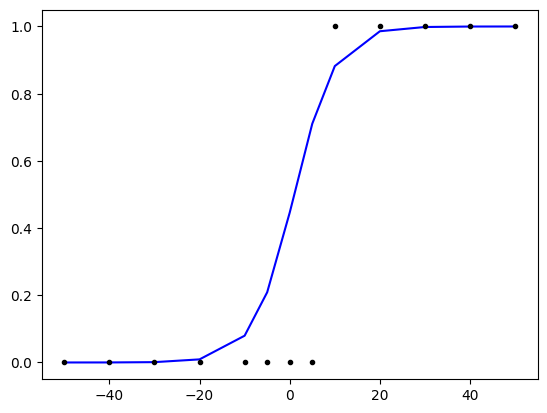

In [45]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [46]:
#위의 그래프를 보면 x의 값이 5에서 10 사이일 때 정확도(y=predict(x))가 0.5를 넘기 시작했다.
print(model.predict([1,2,3,4,4.5])) #x의 값이 1과 5 사이일때
print(model.predict([11, 21, 31, 41, 500])) #x의 값이 5보다 클 때

1/1 [==============================] - 0s 82ms/step
[[0.5015877]
 [0.5570835]
 [0.6111899]
 [0.6626888]
 [0.6871419]]
1/1 [==============================] - 0s 39ms/step
[[0.9034518 ]
 [0.9886375 ]
 [0.99876547]
 [0.9998671 ]
 [1.        ]]


다중 선형 회귀(독립변수가 2개 이상)

In [48]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [60]:
X=np.array([[70,85,11], [71, 89, 18], [50, 80, 20], [99, 20, 10], [50, 10, 10], [20, 99, 10], [40, 50, 20]])
y=np.array([73, 82,72,57,34])
X_train=X[:5]
X_test=X[5:]

In [61]:
print(X_train)

[[70 85 11]
 [71 89 18]
 [50 80 20]
 [99 20 10]
 [50 10 10]]


In [90]:
model=Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))
model.compile(optimizer='sgd',loss='mse', metrics=['mse'])
model.fit(X_train, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 1s/step - loss: 13831.2656 - mse: 13831.2656
Epoch 2/2000
1/1 [==============================] - 0s 22ms/step - loss: 406734688.0000 - mse: 406734688.0000
Epoch 3/2000
1/1 [==============================] - 0s 20ms/step - loss: 11978023108608.0000 - mse: 11978023108608.0000
Epoch 4/2000
1/1 [==============================] - 0s 32ms/step - loss: 352747656885305344.0000 - mse: 352747656885305344.0000
Epoch 5/2000
1/1 [==============================] - 0s 31ms/step - loss: 10388269738770707775488.0000 - mse: 10388269738770707775488.0000
Epoch 6/2000
1/1 [==============================] - 0s 19ms/step - loss: 305930193111132722161516544.0000 - mse: 305930193111132722161516544.0000
Epoch 7/2000
1/1 [==============================] - 0s 17ms/step - loss: 9009514834974745465981077815296.0000 - mse: 9009514834974745465981077815296.0000
Epoch 8/2000
1/1 [==============================] - 0s 12ms/step - loss: 2653264011623946975236433998407

In [91]:
print(model.predict(X_train))
print(model.predict(X_test))

1/1 [==============================] - 0s 112ms/step
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1/1 [==============================] - 0s 44ms/step
[[nan]
 [nan]]


다중 로지스틱 회귀

In [96]:
X = np.array([[0, 0], [0, 1], [1, 0], [0, 2], [1, 1], [2, 0]])
y = np.array([0, 0, 0, 1, 1, 1])

In [98]:

model=Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy',metrics=['binary_accuracy'])
model.fit(X, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 426ms/step - loss: 0.8914 - binary_accuracy: 0.5000
Epoch 2/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.8903 - binary_accuracy: 0.3333
Epoch 3/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.8892 - binary_accuracy: 0.3333
Epoch 4/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.8880 - binary_accuracy: 0.3333
Epoch 5/2000
1/1 [==============================] - 0s 15ms/step - loss: 0.8869 - binary_accuracy: 0.3333
Epoch 6/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.8858 - binary_accuracy: 0.3333
Epoch 7/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.8846 - binary_accuracy: 0.3333
Epoch 8/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.8835 - binary_accuracy: 0.3333
Epoch 9/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.8824 - binary_accuracy: 0.3333
Epoch 10/2000
1/1 [==========================

In [99]:
print(model.predict(X))

1/1 [==============================] - 0s 126ms/step
[[0.18445319]
 [0.46734327]
 [0.4516534 ]
 [0.77291363]
 [0.7616337 ]
 [0.7499748 ]]


벡터와 행렬 연산



*   벡터 : 크기와 방향을 가진 양. 파이썬에서는 1차원 배열 or 리스트
*   행렬 : 행과 열을 가지는 2차원 형상. 파이썬에서는 2차원 배열


*   텐서 : 3차원 이상

*   항목 추가
*   항목 추가


*   항목 추가





In [101]:
import numpy as np

#0차원 텐서(스칼라)
d=np.array(5)
print('텐서의 차원 : ', d.ndim) #0차원(0 Dimension) 텐서. ndim-> 축(axis)의 개수 or 텐서의 차원
print('텐서의 크기(shape) : ', d.shape)

텐서의 차원 :  0
텐서의 크기(shape) :  ()


In [104]:
#1차원 텐서(벡터) -> 숫자를 배열한 것. 벡터의 차원과 텐서의 차원은 다름
d=np.array([1,2,3,4]) #벡터는 1차원 텐서(축의 개수). 하지만 d는 4차원 벡터(하나의 축에 놓인 원소의 개수)임.
print('텐서의 차원 : ', d.ndim)
print('텐서의 크기(shape)', d.shape)

텐서의 차원 :  1
텐서의 크기(shape) (4,)


In [105]:
#2차원 텐서(행렬) -> 행과 열이 존재하는 벡터의 배열(matrix)
d=np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print('텐서의 차원 : ', d.ndim)
print('텐서의 크기(shape)', d.shape) #각 축을 따라서 몇개의 차원인가.(벡터의 차원)

텐서의 차원 :  2
텐서의 크기(shape) (3, 4)


In [107]:
#3차원 텐서(다차원 배열) -> sequence 데이터(단어의 시퀀스)를 표현할 때 사용. 문장, 문서, 뉴스 기사 등의 텍스트
d=np.array([
            [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [10, 11, 12, 13, 14]],
            [[15, 16, 17, 18, 19], [19, 20, 21, 22, 23], [23, 24, 25, 26, 27]]
            ])
print('텐서의 차원 : ', d.ndim)
print('텐서의 크기(shape) : ', d.shape)

텐서의 차원 :  3
텐서의 크기(shape) :  (2, 3, 5)




*   시퀀스 : samples, timesteps, word_dim 또는 batch_size, timesteps, word_dim
*   samples 또는 batch_size = 샘플의 개수
*   timesteps = 시퀀스의 길이
*   wrod_dim = 단어를 표현하는 벡터의 차원
*   단어 벡터화의 대표적인 예시 : 원-핫 인코딩, 워드 임베딩


*   I like NLP, I like DL, DL is AI


*   이 세 문장을 원-핫 벡터로 만들면


*   [[[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0]],  
[[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0]],  
[[0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1]]]  

*   이렇게 훈련 데이터를 다수 묶어서 입력으로 사용하는 것을 딥 러닝에서 배치(Batch)라고 말한다.




리스트와 배열의 차이
1.   배열은 선언돼야 하지만 리스트는 그렇지 않다.
2.   배열은 array module이나 numpy를 이용하지만 리스트는 대괄호로 원소들을 감싸주기만 하면 된다.

1.   배열은 데이터를 메모리에 조밀하게 저장가능하다. 리스트는 쉬운 원소 추가를 위해 큰 메모리가 필요하다.
2.   배열은 한 원소에 대해 추가, 삭제, 업데이트를 하기에 변경이 어렵다. 리스트는 반면 변경이 쉽다.

1.   배열은 사칙연산에 뛰어나다. 리스트는 직접적으로 수학적 연산이 안된다.
2.   배열은 모든 원소가 같은 크기를 가져야 한다. 리스트는 리스트 안에 중첩이 가능하다. (리스트 안에 리스트)






벡터의 행렬과 연산

In [109]:
import numpy as np
A=np.array([8, 4, 5])
B=np.array([1,2,3])
print(A+B)
print(A-B)

[9 6 8]
[7 2 2]


In [110]:
A = np.array([[10, 20, 30, 40], [50, 60, 70, 80]])
B = np.array([[5, 6, 7, 8],[1, 2, 3, 4]])
print('두 행렬의 합 :')
print(A + B)
print('두 행렬의 차 :')
print(A - B) #단순하게 모든 같은 행과 열은 더하고 뺀다.

두 행렬의 합 :
[[15 26 37 48]
 [51 62 73 84]]
두 행렬의 차 :
[[ 5 14 23 32]
 [49 58 67 76]]


*   벡터의 내적(점곱)(=dot product, =inner product)
*   두 벡터의 차원이 같아야 하며, 앞의 벡터가 행벡터, 뒤의 벡터가 열벡터.

*   벡터(1차원 텐서)의 내적(점곱) 결과는 스칼라(0차원 텐서)이다.





In [111]:
A=np.array([1,2,3])
B=np.array([4,5,6])
print('두 벡터의 내적 : ', np.dot(A,B))


두 벡터의 내적 :  32


*   행렬의 곱셈 : 왼쪽 행렬의 행벡터와 오른쪽 행렬의 열벡터의 내적의 결과 행렬
*   두 행렬의 곱 AxB가 성립되기 위해서는 행렬 A의 열의 개수와 행렬 B의 행의 개수가 같아야 한다.


*   두 행렬의 곱 AxB의 결과 행렬AB의 크기는 A의 행의 개수와 B의 열의 개수를 가진다.





In [115]:
A=np.array([[1,2,3],[4,5,6]])
B=np.array([[5,6],[7,8],[9,10]])
print('두 행렬의 곱 : ')
print(np.matmul(A,B))

두 행렬의 곱 : 
[[ 46  52]
 [109 124]]




*   소프트맥스 회귀(Softmax Regression) : 로지스틱 회귀는 2개의 선택지 중 1개를 고르는 이진분류(Binary Classification)이었지만 소프트맥스 휘귀는 3개 이상의 선택지 중에서 1개를 고르는 다중 클래스 분류이다.
*   시그모이드 함수는 0.5 이상이면 1, 이하이면 0으로 이진분류를 한다. 그러나 답이 0.8, 0.2, 0.4 등과 같은 출력을 얻게 된다면 확률이 1을 넘어간다. 이럴 경우에는 0.7, 0.05, 0.25 와 같이 세 개의 확률이 총 1인 예측값을 얻기 위해 사용하는 것이 소프트맥스 함수이다.


*   소프트맥스 함수는 정수 인코딩이 아닌 원-핫 인코딩으로 계산하며 그 이유는 단순히 1~10까지 인코딩을 하게 된다면 실젯값과 기댓값에 대한 오차의 제곱이 거리를 나타내게 되어버리며 단순히 정수로 인코딩을 한 결과가 거리차를 크게 나타내어 버리게 되면서 실제의 거리와 매우 다르게 나타난다.

*   정수 인코딩 : (2-1)^2 + (3-1)^2 + ... + (n-1)^2
*   원-핫 인코딩 : ((1,0,0)-(0,1,0))^2+... -> 모든 유클리드 거리가 동일함(단어의 유사성을 구할 수는 없음)



*   입력이 x(4x1), 예측값이 y(3x1)이면
*   softmax(w(3,4)x x(4x1) + b(3x1))=y(3x1)  -->  가중치 행렬 w와 편향 b의 차원을 예측할 수 있다.

*   로지스틱 회귀와 마찬가지로 크로스 엔트로피 함수를 사용한다.

*   y=실제값, k=클래스의 개수, yj는 실제값 원-핫 벡터의 j번째 인덱스(y[j]), pj는 샘플 데이터가 j번째 클래스일 확률

*   cost=-(sum(j=1~k)y[j]log(pj))
*   c가 실제값 원-핫 벡터에서 1을 가진 원소의 인덱스라고 한다면, pc=1은 pj가 y를 정확하게 예측한 경우가 된다. 식에 대입하면 -1log(1)=0이 되어 결과적으로 크로스 엔트로피 함수의 값이 0이 된다. 즉, 크로스 엔트로피의 값을 최소화하는 방향으로 계산을 해야 한다.


*   이진 분류(로지스틱 회귀)에서의 크로스 엔트로피 함수 : cost = -(ylogH(x) + (1-y)log(1-H(x)))  ------>  y->y1, 1-y->y2, H(x)->p1, 1-H(x)->p2 치환


*   -(y1log(p1)+y2log(p2)) -->   -(sum(i=1~2)(yi)log(pi)) -->   소프트맥스 회귀에서는 k의 값이 고정이 아니므로(이진분류가 아님) 2에서 k로 변경한다.
*   결국 로지스틱 회귀와 원리가 같다.


*   cost=-(1/n)sum(i=1~n)sum(j=1~k)((yj)^i)(log((pj)^i))
*   =-(1/n)sum(i=1~n)[(y^i)log(p^i)+(1-(y^i))log(1-(p^i))] -> 2를 넣으면 로지스틱 회귀의 비용함수와 같다.












In [137]:
#소프트맥스 회귀 실습
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [138]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/06.%20Machine%20Learning/dataset/Iris.csv", filename="Iris.csv")

('Iris.csv', <http.client.HTTPMessage at 0x7bdc3e21f700>)

In [140]:
data=pd.read_csv('Iris.csv', encoding='latin1')
print('샘플의 개수 : ', len(data))
data.head()

샘플의 개수 :  150


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [141]:
#품종이 몇개인지 구분하기
print(data['Species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


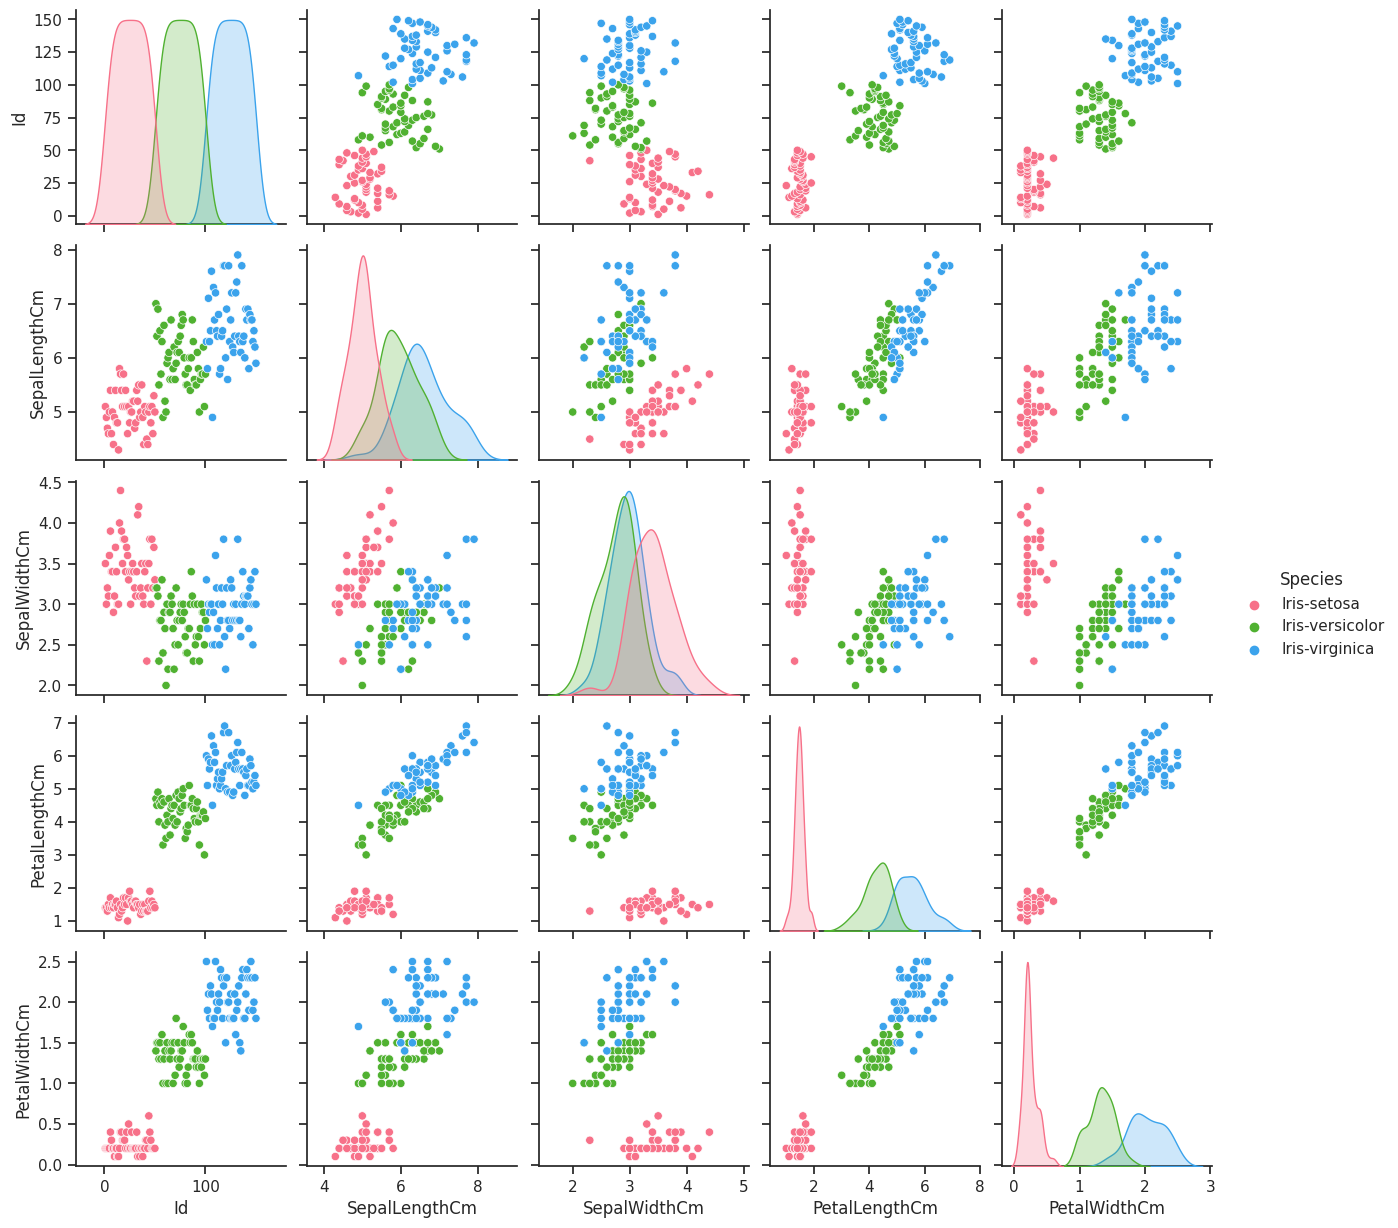

In [142]:
#Id는 분류에 의미가 없으므로 독립변수 입력 4개의 특성으로 3개 중 어떤 품종인지 알아야 함.
sns.set(style='ticks', color_codes=True)
g=sns.pairplot(data, hue='Species', palette='husl') #sns의 pairplot은 데이터프레임을 입력으로 받아 각 열의 조합에 따라서 산점도로 보여준다.
#같은 열끼리 걸렸을 때에는 히스토그램으로 나타난다.

<Axes: >

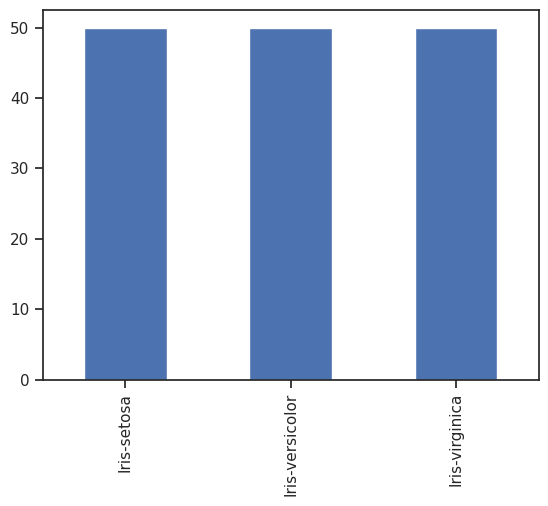

In [148]:
data['Species'].value_counts().plot(kind='bar')
#150개의 데이터 중 각 품종이 몇개 있는지 확인한다. -> 동일하게 50개씩 존재

<Axes: >

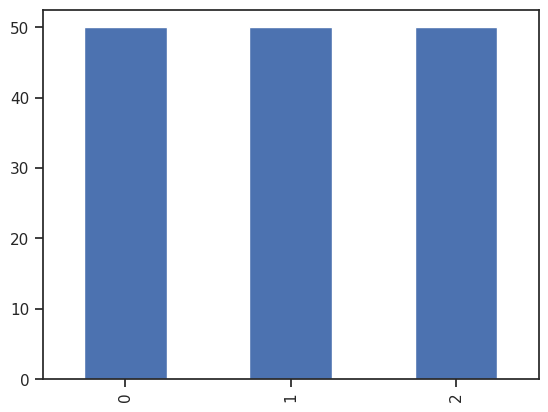

In [158]:
#정수 인코딩
data['Species']=data['Species'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0,1,2])
data['Species'].value_counts().plot(kind='bar') #데이터의 개수를 시각화

In [159]:
X=data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values #values로 각 행의 입력값들을 한 행(배열)으로 묶는다.
y=data['Species'].values

In [160]:
(X_train, X_test, y_train, y_test)=train_test_split(X,y,train_size=0.8, random_state=1)

#원-핫 벡터 인코딩
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [162]:
#소프트맥스 회귀
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(3,input_dim=4, activation='softmax')) #softmax를 활성화 하고, 4차원을 3차원으로 아웃풋시킨다.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #로지스틱 회귀에서는 이진분류이기 때문에 비용함수가 'binary_crossentropy'였지만 다중 분류이기 때문에 'categorical_crossentropy'로 사용한다. 옵티마이저로는 경사하강법 중 하나인 adam을 사용하고, 표현할 것은 정확도(accuracy)이다.
history=model.fit(X_train, y_train, epochs=200, batch_size=1, validation_data=(X_test, y_test)) #validation_data는 훈련에는 사용하지 않고 각 훈련횟수마다 실제 답과의 정확도를 출력한다. batch_size는 트레이닝 데이터를 batch_size로 나누어 훈련

Epoch 1/200
120/120 [==============================] - 1s 7ms/step - loss: 3.0677 - accuracy: 0.3500 - val_loss: 3.5056 - val_accuracy: 0.5000
Epoch 2/200
120/120 [==============================] - 0s 4ms/step - loss: 2.3236 - accuracy: 0.6833 - val_loss: 2.8051 - val_accuracy: 0.5667
Epoch 3/200
120/120 [==============================] - 0s 2ms/step - loss: 1.8375 - accuracy: 0.6917 - val_loss: 2.1830 - val_accuracy: 0.5667
Epoch 4/200
120/120 [==============================] - 0s 2ms/step - loss: 1.4157 - accuracy: 0.6917 - val_loss: 1.6120 - val_accuracy: 0.5667
Epoch 5/200
120/120 [==============================] - 0s 2ms/step - loss: 1.0965 - accuracy: 0.6917 - val_loss: 1.2359 - val_accuracy: 0.5667
Epoch 6/200
120/120 [==============================] - 0s 2ms/step - loss: 0.9252 - accuracy: 0.4917 - val_loss: 1.0504 - val_accuracy: 0.3000
Epoch 7/200
120/120 [==============================] - 0s 2ms/step - loss: 0.8451 - accuracy: 0.4667 - val_loss: 0.9571 - val_accuracy: 0.3333

<function matplotlib.pyplot.show(close=None, block=None)>

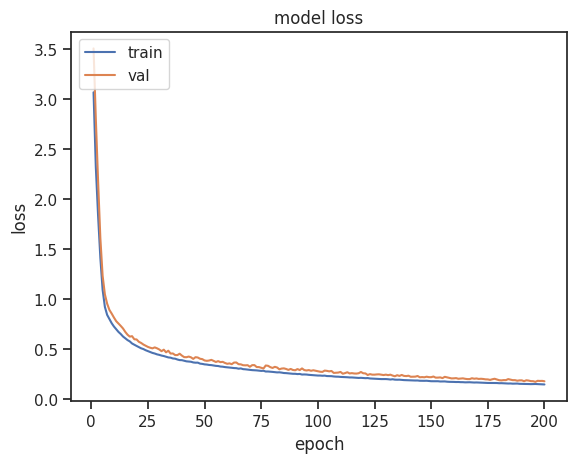

In [165]:
epochs=range(1,len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show

In [170]:
#epochs가 증가할수록 loss가 작아진다.
print("\n 테스트 정확도 : %.4f" %(model.evaluate(X_test, y_test)[1])) #손실값과 정확도를 반환

1/1 [==============================] - 0s 132ms/step - loss: 0.1820 - accuracy: 1.0000

 테스트 정확도 : 1.0000
